# Introduction

We first imported libraries we will be using and read in the coffee csv file.

In [75]:
# imports 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
# read csv file
coffee = pd.read_csv("coffee_train.csv")
coffee

Unnamed: 0  Species                             Owner  \
0           1076  Arabica                   eileen koyanagi   
1            155  Arabica    exportadora de cafe condor s.a   
2           1294  Arabica                      kurt kappeli   
3            448  Arabica            yunnan coffee exchange   
4            237  Arabica  kona pacific farmers cooperative   
...          ...      ...                               ...   
1065         394  Arabica      doi tung development project   
1066         582  Arabica         juan luis alvarado romero   
1067         539  Arabica                  renee a. perrine   
1068         778  Arabica                       raúl vargas   
1069         673  Arabica                        adam kline   

           Country_of_Origin                          Farm_Name  Lot_Number  \
0     United States (Hawaii)                                NaN         NaN   
1                   Colombia                            various         NaN   
2                     Mexico                            various         NaN   
3                      China        yunnan success trade co.ltd   YNC-16028   
4     United States (Hawaii)                                NaN         NaN   
...                      ...                                ...         ...   
1065                Thailand       doi tung development project         NaN   
1066               Guatemala                       la esmeralda  11/23/0690   
1067             Philippines  kalugmanan agri development corp.         NaN   
1068                Colombia                                NaN           2   
1069               Guatemala                                NaN         NaN   

                                   Mill          ICO_Number  \
0                                   NaN            KP010914   
1                   trilladora boananza           3-68-0005   
2                            u.c.i.r.i.      0016-2722-0001   
3      yunnan success trade co.ltd mill                 NaN   
4                                   NaN  2234504 KONA PRIME   
...                                 ...                 ...   
1065                                NaN                 NaN   
1066                   beneficio ixchel          11/23/0690   
1067  kalugmanan agri development corp.                 444   
1068                   san josé / neiva          03-05-0846   
1069                                NaN        11/0052/0538   

                               Company     Altitude  ...       Color  \
0     kona pacific farmers cooperative          NaN  ...       Green   
1       exportadora de cafe condor s.a    1800 msnm  ...       Green   
2       upctiz zapoteca s.p.r. de r.l.  1200 meters  ...         NaN   
3               yunnan coffee exchange         1600  ...       Green   
4     kona pacific farmers cooperative          NaN  ...       Green   
...                                ...          ...  ...         ...   
1065                               NaN          NaN  ...         NaN   
1066              unex guatemala, s.a.         4000  ...       Green   
1067              hineleban foundation    1200 masl  ...  Blue-Green   
1068               skn caribecafe ltda          NaN  ...       Green   
1069                               NaN         1600  ...         NaN   

     Category_Two_Defects           Expiration            Certification_Body  \
0                       0   February 4th, 2015  Specialty Coffee Association   
1                       6    October 9th, 2013                      Almacafé   
2                       1        May 8th, 2015  Specialty Coffee Association   
3                       3      April 5th, 2017        Yunnan Coffee Exchange   
4                       9   January 24th, 2014  Specialty Coffee Association   
...                   ...                  ...                           ...   
1065                    0     April 13th, 2011  Specialty Coffee Association   
1066                    1    August 22

# Data Cleaning

We started by looking at which variables have the most null values. We will then choose to drop certain columns or fill in values depending on their importance or impact in the dataset. 

Ultimately, we dropped the `Lot Number` column as it does not impact the total cup points and has a large proportion (855) of null values. The rest of the columns either had overlapping null values or did not have a significant amount, and thus, we dropped the rest of the rows with null values from here.

In [77]:
# shows count of null values for each column

coffee.isnull().sum()

Unnamed: 0                 0
Species                    0
Owner                      7
Country_of_Origin          0
Farm_Name                275
Lot_Number               855
Mill                     250
ICO_Number               116
Company                  167
Altitude                 173
Region                    39
Producer                 179
Number_of_Bags             0
Bag_Weight                 0
In_Country_Partner         0
Harvest_Year              35
Grading_Date               0
Owner_1                    7
Variety                  177
Processing_Method        131
Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Clean_Cup                  0
Sweetness                  0
Cupper_Points              0
Total_Cup_Points           0
Moisture                   0
Category_One_Defects       0
Quakers                    0
Color         

In [5]:
# we decided to drop Lot_Number first (has 855 null values), and then drop the rest of the NaN values 
# so we can create a pairplot 

coffee = coffee.drop(["Lot_Number"], axis = 1)
coffee

Unnamed: 0  Species                             Owner  \
0           1076  Arabica                   eileen koyanagi   
1            155  Arabica    exportadora de cafe condor s.a   
2           1294  Arabica                      kurt kappeli   
3            448  Arabica            yunnan coffee exchange   
4            237  Arabica  kona pacific farmers cooperative   
...          ...      ...                               ...   
1065         394  Arabica      doi tung development project   
1066         582  Arabica         juan luis alvarado romero   
1067         539  Arabica                  renee a. perrine   
1068         778  Arabica                       raúl vargas   
1069         673  Arabica                        adam kline   

           Country_of_Origin                          Farm_Name  \
0     United States (Hawaii)                                NaN   
1                   Colombia                            various   
2                     Mexico                            various   
3                      China        yunnan success trade co.ltd   
4     United States (Hawaii)                                NaN   
...                      ...                                ...   
1065                Thailand       doi tung development project   
1066               Guatemala                       la esmeralda   
1067             Philippines  kalugmanan agri development corp.   
1068                Colombia                                NaN   
1069               Guatemala                                NaN   

                                   Mill          ICO_Number  \
0                                   NaN            KP010914   
1                   trilladora boananza           3-68-0005   
2                            u.c.i.r.i.      0016-2722-0001   
3      yunnan success trade co.ltd mill                 NaN   
4                                   NaN  2234504 KONA PRIME   
...                                 ...                 ...   
1065                                NaN                 NaN   
1066                   beneficio ixchel          11/23/0690   
1067  kalugmanan agri development corp.                 444   
1068                   san josé / neiva          03-05-0846   
1069                                NaN        11/0052/0538   

                               Company     Altitude  \
0     kona pacific farmers cooperative          NaN   
1       exportadora de cafe condor s.a    1800 msnm   
2       upctiz zapoteca s.p.r. de r.l.  1200 meters   
3               yunnan coffee exchange         1600   
4     kona pacific farmers cooperative          NaN   
...                                ...          ...   
1065                               NaN          NaN   
1066              unex guatemala, s.a.         4000   
1067              hineleban foundation    1200 masl   
1068               skn caribecafe ltda          NaN   
1069                               NaN         1600   

                              Region  ...       Color  Category_Two_Defects  \
0                               kona  ...       Green                     0   
1                              huila  ...       Green                     6   
2        sierra alta mixe y zapoteca  ...         NaN                     1   
3                  dehong prefecture  ...       Green                     3   
4                               kona  ...       Green                     9   
...                              ...  ...         ...                   ...   
1065                             NaN  ...         NaN                     0   
1066                         oriente  ...       Green                     1   
1067  bukidnon, mindanao, philppines  ...  Blue-Green                     1   
1068                           huila  ...       Green                     6   
1069                   huehuetenango  ...         NaN                    14   

               Expiration            Certification_Body  \
0      February 4t

## EDA

To start our EDA, we first wanted to take a look at our data as a whole. We first used a pairplot and noticed that many of the features such as `Flavor` and `Aftertaste` are linearly correlated. Thus, we used the .corr() function to look at the r value (correlation coefficient) between each feature and the `Total_Cup_Points`, which is the variable we are trying to predict. 

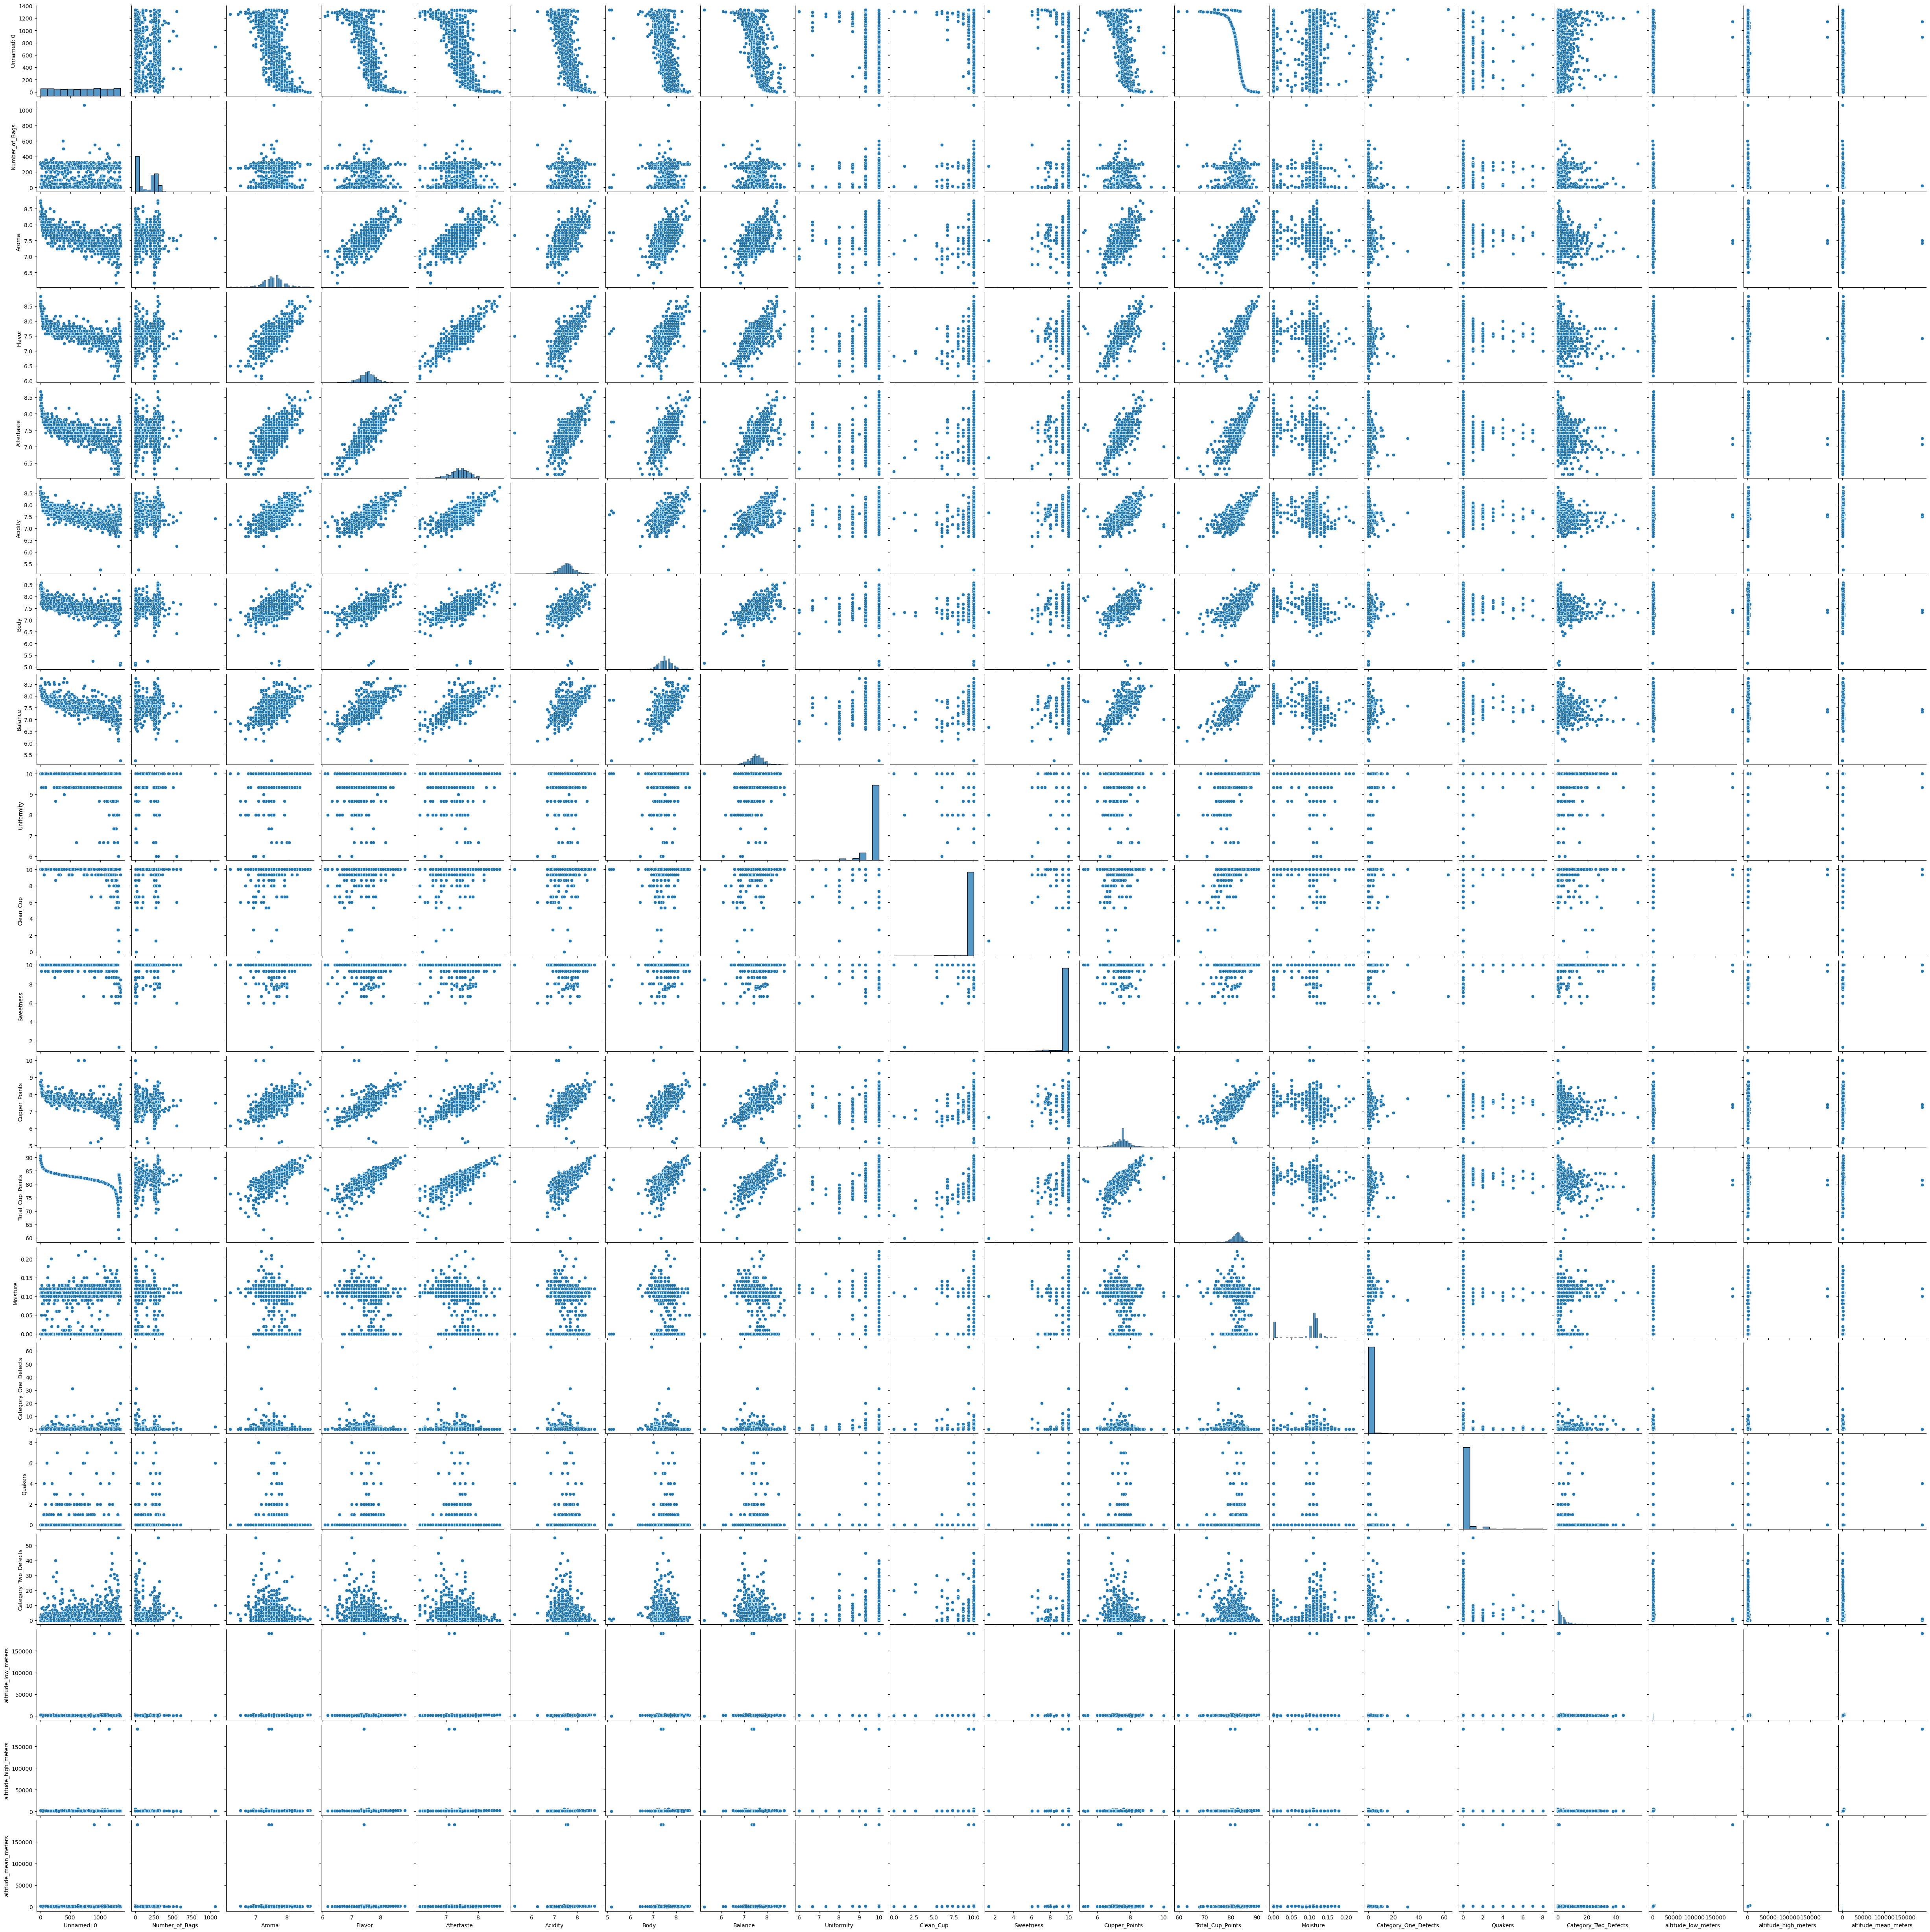

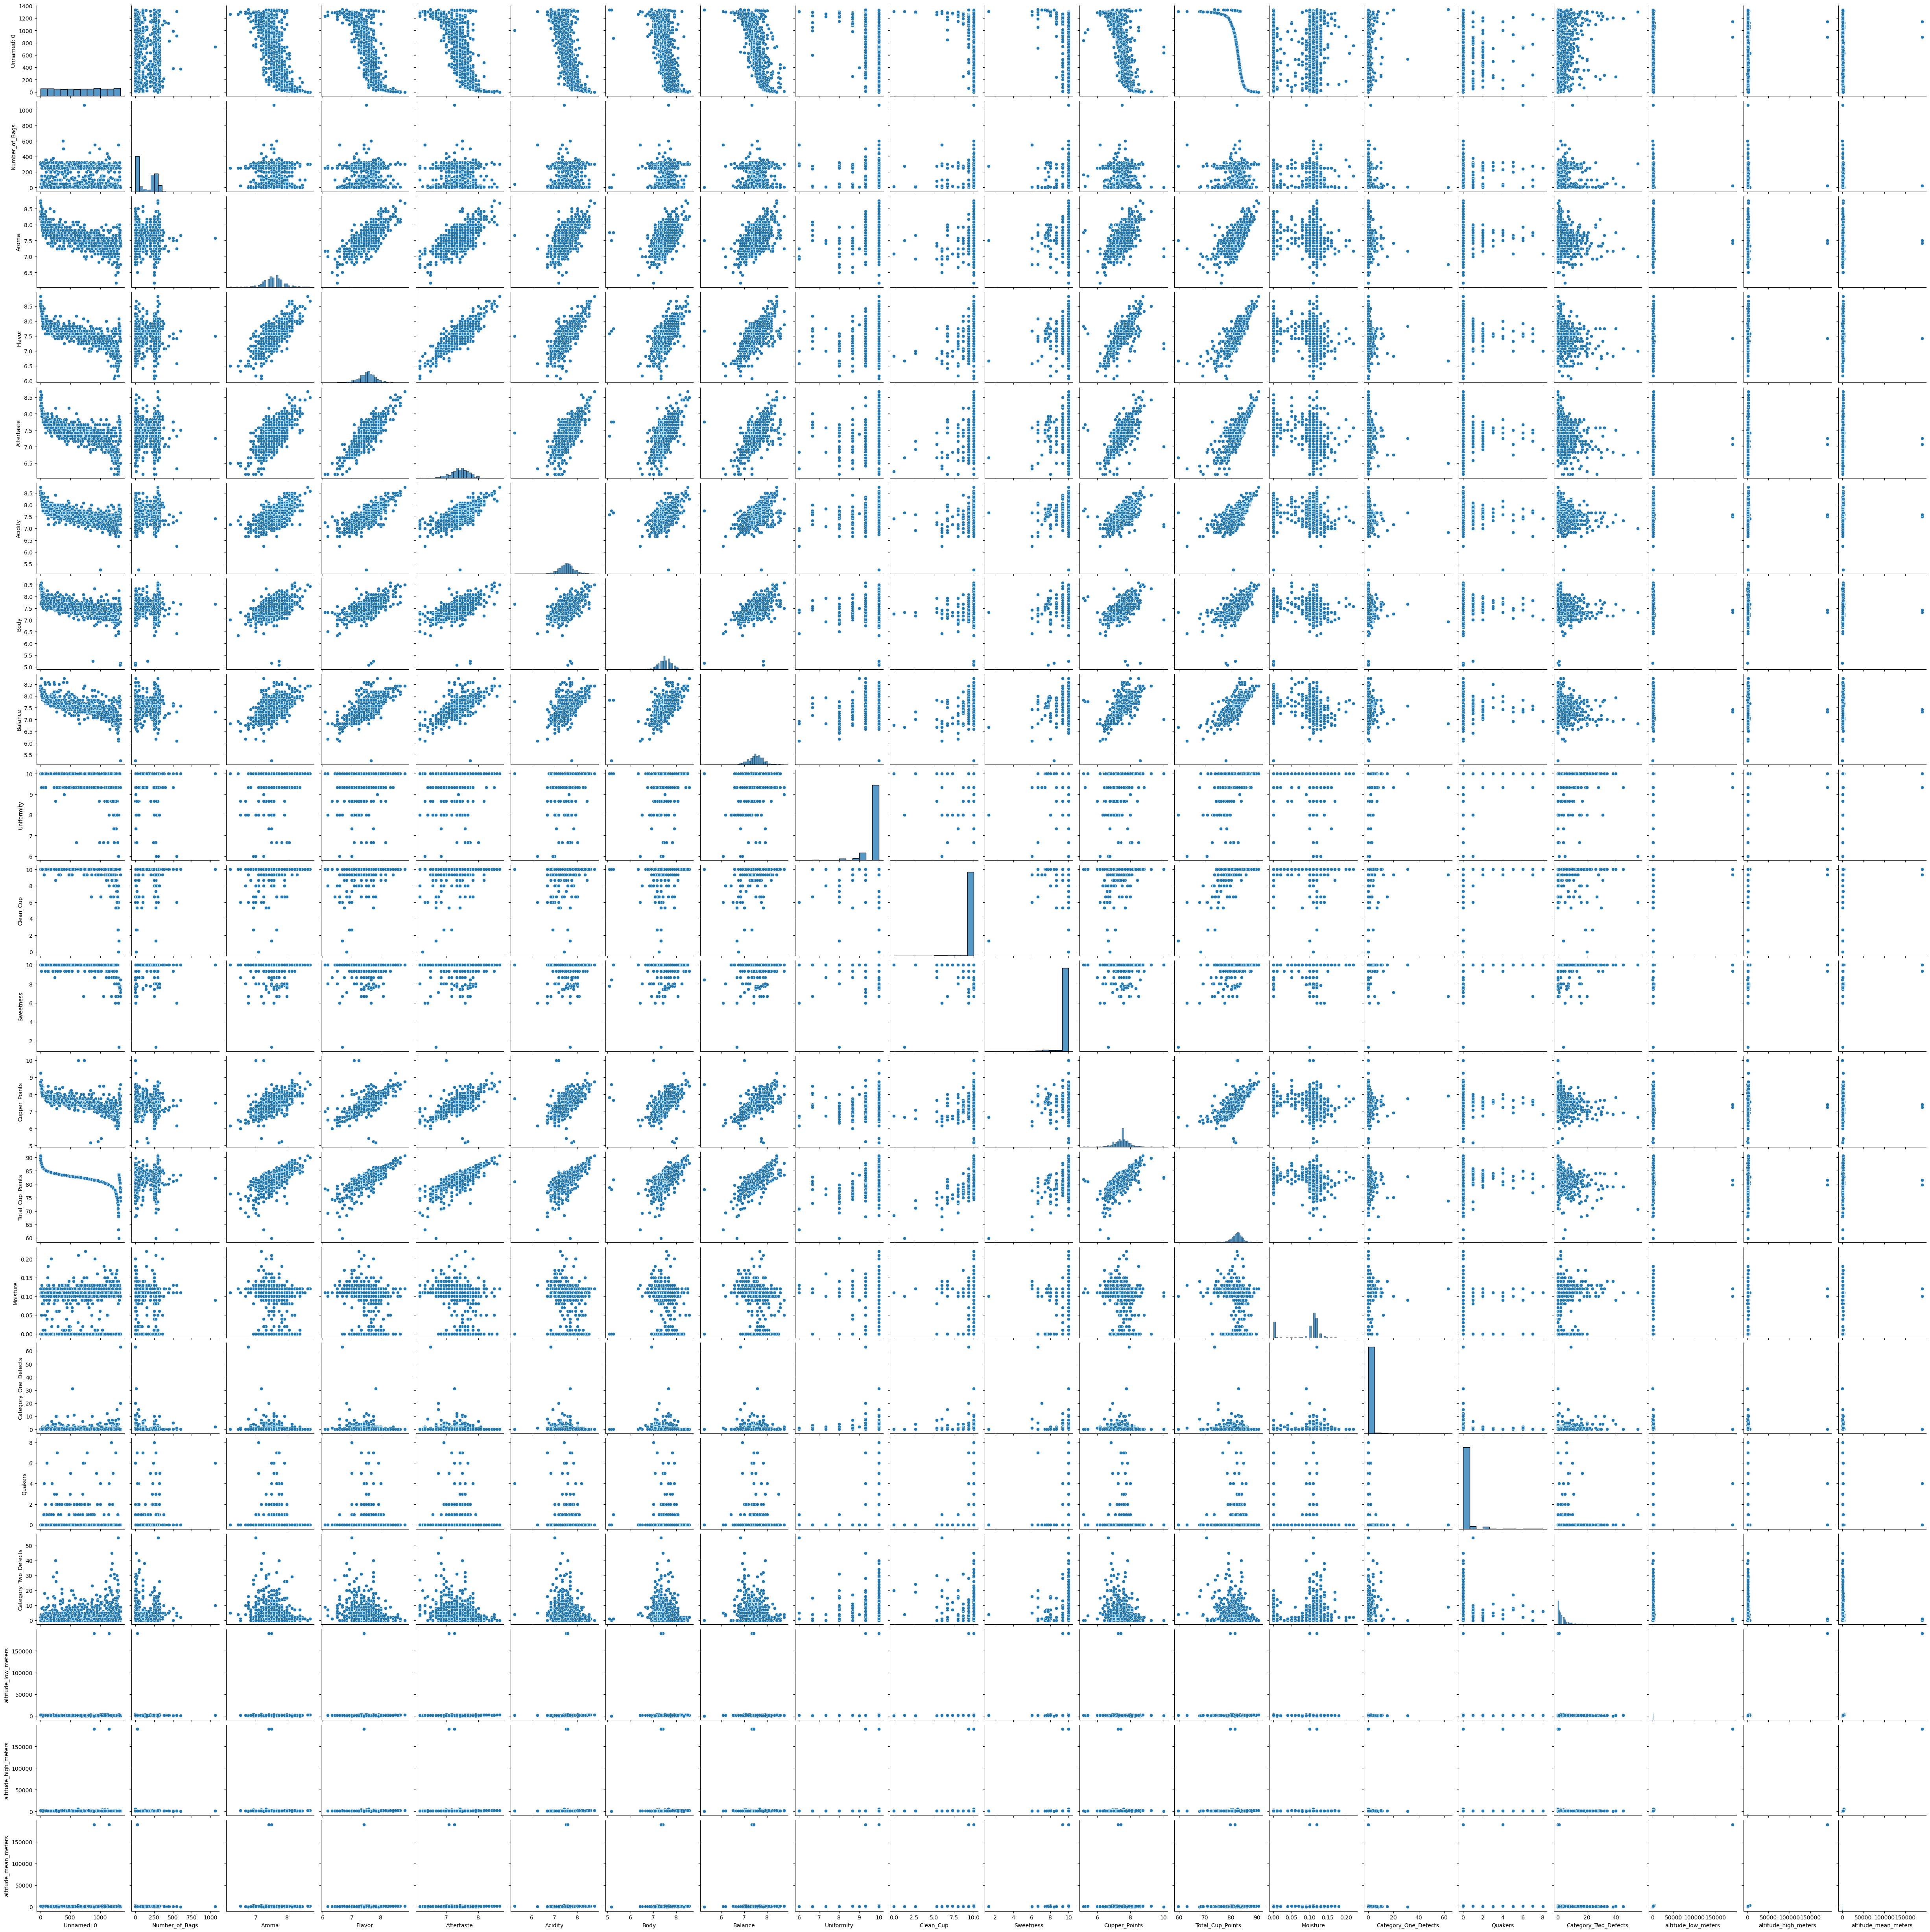

In [70]:
# created a pairplot 

sns.pairplot(coffee)
plt.show()

In [74]:
# computed a pairwise correlation of all quantitative columns 

coffee.corr()

Unnamed: 0  Number_of_Bags     Aroma    Flavor  \
Unnamed: 0              1.000000       -0.059970 -0.691316 -0.775761   
Number_of_Bags         -0.059970        1.000000  0.012269  0.021219   
Aroma                  -0.691316        0.012269  1.000000  0.755677   
Flavor                 -0.775761        0.021219  0.755677  1.000000   
Aftertaste             -0.761997        0.014082  0.716982  0.862043   
Acidity                -0.704521        0.049332  0.626325  0.749624   
Body                   -0.642235        0.058404  0.545258  0.621055   
Balance                -0.727305        0.042873  0.615261  0.717111   
Uniformity             -0.330010        0.036668  0.137235  0.214463   
Clean_Cup              -0.298115        0.040238  0.189412  0.274467   
Sweetness              -0.317114        0.010926  0.032590  0.092214   
Cupper_Points          -0.710184        0.014508  0.616481  0.738477   
Total_Cup_Points       -0.842412        0.046048  0.693884  0.821132   
Moisture                0.154045       -0.069540 -0.157232 -0.169395   
Category_One_Defects    0.096745       -0.078673 -0.122053 -0.111092   
Quakers                -0.009119        0.132797  0.001805  0.001634   
Category_Two_Defects    0.194664       -0.010376 -0.185365 -0.241055   
altitude_low_meters     0.034594       -0.044131 -0.010727 -0.007994   
altitude_high_meters    0.033062       -0.044511 -0.009918 -0.006860   
altitude_mean_meters    0.033830       -0.044323 -0.010324 -0.007427   

                      Aftertaste   Acidity      Body   Balance  Uniformity  \
Unnamed: 0             -0.761997 -0.704521 -0.642235 -0.727305   -0.330010   
Number_of_Bags          0.014082  0.049332  0.058404  0.042873    0.036668   
Aroma                   0.716982  0.626325  0.545258  0.615261    0.137235   
Flavor                  0.862043  0.749624  0.621055  0.717111    0.214463   
Aftertaste              1.000000  0.712938  0.633253  0.746129    0.207698   
Acidity                 0.712938  1.000000  0.573267  0.618551    0.160996   
Body                    0.633253  0.573267  1.000000  0.667318    0.080816   
Balance                 0.746129  0.618551  0.667318  1.000000    0.214022   
Uniformity              0.207698  0.160996  0.080816  0.214022    1.000000   
Clean_Cup               0.259471  0.155170  0.104127  0.243123    0.411737   
Sweetness               0.065097  0.032813  0.059479  0.084398    0.294449   
Cupper_Points           0.740329  0.625711  0.535592  0.657029    0.195115   
Total_Cup_Points        0.807353  0.694326  0.626924  0.758689    0.513364   
Moisture               -0.199081 -0.146858 -0.164295 -0.223629    0.014261   
Category_One_Defects   -0.120587 -0.116252 -0.064630 -0.090184   -0.071025   
Quakers                -0.021483 -0.033534  0.009818 -0.010540    0.021078   
Category_Two_Defects   -0.250753 -0.168802 -0.118225 -0.198739   -0.146598   
altitude_low_meters    -0.025646  0.010989 -0.014950 -0.010682   -0.018487   
altitude_high_meters   -0.024086  0.012394 -0.013305 -0.008769   -0.017508   
altitude_mean_meters   -0.024867  0.011692 -0.014128 -0.009726   -0.017998   

                      Clean_Cup  Sweetness  Cupper_Points  Total_Cup_Points  \
Unnamed: 0            -0.298115  -0.317114      -0.710184         -0.842412   
Number_of_Bags         0.040238   0.010926       0.014508          0.046048   
Aroma                  0.189412   0.032590       0.616481          0.693884   
Flavor                 0.274467   0.092214       0.738477          0.821132   
Aftertaste             0.259471   0.065097       0.740329          0.807353   
Acidity                0.155170   0.032813       0.625711          0.694326   
Body                   0.104127   0.059479       0.535592          0.626924   
Balance                0.243123   0.084398       0.657029          0.758689   
Uniformity             0.411737   0.294449       0.195115          0.513364   
Clean_Cup              1.000000   0.335644       0.249534          0.612029   
S

### Color Analysis

We continue our EDA by looking at the relationships of some of the qualitative features, for example, the color of coffee bean. 

At first we attempted one-hot-encoding, but after taking a closer look at the relationship between `Color` and `Total_Cup_Points`, we found that there was not a significant relationship, and thus removed it from our dataset when building our model.

In [78]:
# displays frequency of different colors

coffee[['Color']].value_counts(normalize = True)

Color       
Green           0.777283
Bluish-Green    0.100223
Blue-Green      0.074610
None            0.047884
dtype: float64

In [79]:
# dataframe for just color and total cup points -- ignore for now, was using for one-hot-encoding

color_points = pd.DataFrame(coffee[["Color", "Total_Cup_Points"]])
color_points

Color  Total_Cup_Points
0          Green             80.50
1          Green             84.58
2            NaN             72.92
3          Green             83.17
4          Green             84.08
...          ...               ...
1065         NaN             83.42
1066       Green             82.75
1067  Blue-Green             82.92
1068       Green             82.08
1069         NaN             82.50

[1070 rows x 2 columns]

In [64]:
# one-hot-encoded chart of color-- we ended up not using the color variable

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder_color = pd.DataFrame(encoder.fit_transform(color_points[['Color']]).toarray())
final_color_points = encoder_color.join(color_points).drop(["Color"], axis=1)
final_color_points

0    1    2    3    4  Total_Cup_Points
0     0.0  0.0  1.0  0.0  0.0             80.50
1     0.0  0.0  1.0  0.0  0.0             84.58
2     0.0  0.0  0.0  0.0  1.0             72.92
3     0.0  0.0  1.0  0.0  0.0             83.17
4     0.0  0.0  1.0  0.0  0.0             84.08
...   ...  ...  ...  ...  ...               ...
1065  0.0  0.0  0.0  0.0  1.0             83.42
1066  0.0  0.0  1.0  0.0  0.0             82.75
1067  1.0  0.0  0.0  0.0  0.0             82.92
1068  0.0  0.0  1.0  0.0  0.0             82.08
1069  0.0  0.0  0.0  0.0  1.0             82.50

[1070 rows x 6 columns]

In [10]:
# new dataframe for just color and total cup points with n/a values dropped

color = coffee[["Color", "Flavor", "Total_Cup_Points"]].dropna()
color

Color  Flavor  Total_Cup_Points
0          Green    7.33             80.50
1          Green    7.67             84.58
3          Green    7.67             83.17
4          Green    7.75             84.08
5          Green    7.17             79.00
...          ...     ...               ...
1062       Green    6.50             79.33
1064       Green    7.17             80.42
1066       Green    7.58             82.75
1067  Blue-Green    7.58             82.92
1068       Green    7.58             82.08

[898 rows x 3 columns]

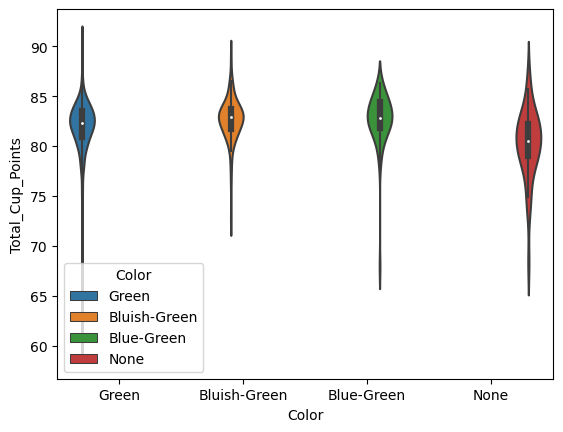

In [11]:
# displayed the relationships between color and total cup points with a violin plot

import matplotlib.pyplot as plt

sns.violinplot(data =color, x = 'Color', y = 'Total_Cup_Points', hue = 'Color')
plt.show()

Through analyzing the `Color` feature, we found that it does not have a significant relationship with `Total_Cup_Points` and thus decided not to include it when building our model.

### Species Analysis

Another qualitative feature we decided to look more into was the `Species` of the coffee bean. We achieved this through grouping the `Species` column and plotting these data points on a scatter plot. 

In [92]:
# new dataframe for just color and total cup points with null values dropped

species = coffee[["Species", "Flavor", "Total_Cup_Points"]].dropna()
species

Species  Flavor  Total_Cup_Points
0     Arabica    7.33             80.50
1     Arabica    7.67             84.58
2     Arabica    7.08             72.92
3     Arabica    7.67             83.17
4     Arabica    7.75             84.08
...       ...     ...               ...
1065  Arabica    7.25             83.42
1066  Arabica    7.58             82.75
1067  Arabica    7.58             82.92
1068  Arabica    7.58             82.08
1069  Arabica    7.58             82.50

[1070 rows x 3 columns]

In [93]:
# grouped the Species and found the average Total_Cup_Points for the two species

grouped_species = species.groupby("Species")["Total_Cup_Points"].mean()
grouped_species

Species
Arabica    82.156459
Robusta    80.776800
Name: Total_Cup_Points, dtype: float64

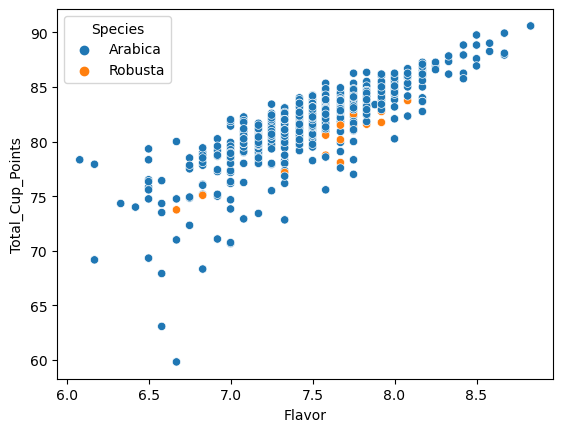

In [142]:
# plotted the relationship between Species and Total_Cup_Points against the Flavor feature on a scatterplot

import matplotlib.pyplot as plt

sns.scatterplot(data=species, x="Flavor", y="Total_Cup_Points", hue="Species")

plt.show()

Ultimately, we decided to also not include the `Species` feature in our model because although Arabica beans did seem to have a slightly higher average `Total_Cup_Points`, there were significantly more Arabica beans than Robusta beans in the dataset.

### Altitude Analysis

Next, we wanted to see if altitude had any impact on the `Total_Cup_Points`. We first did some data cleaning before we plotted our data through a scatterplot.

In [205]:
# removed null values

altitude = coffee[["Altitude", "unit_of_measurement", "Total_Cup_Points"]].dropna()
altitude.head(10)

Altitude unit_of_measurement  Total_Cup_Points
1     1800 msnm                   m             84.58
2   1200 meters                   m             72.92
3          1600                   m             83.17
5          4000                  ft             79.00
6        1200公尺                   m             82.67
7     1880 msnm                   m             83.08
8     1800-2000                   m             85.42
9           894                   m             82.08
10        800++                   m             83.67
11         2000                   m             84.67

In [202]:
# got rid of everything that is not a number so we can plot everything on a scatter plot 

altitude['Altitude'] = altitude['Altitude'].str.replace('\D', '', regex=True)
altitude

Altitude unit_of_measurement  Total_Cup_Points
1        1800                   m             84.58
2        1200                   m             72.92
3        1600                   m             83.17
5        4000                  ft             79.00
6        1200                   m             82.67
...       ...                 ...               ...
1063     1800                   m             83.00
1064     1450                   m             80.42
1066     4000                  ft             82.75
1067     1200                   m             82.92
1069     1600                   m             82.50

[897 rows x 3 columns]

In [203]:
# converted all altitude value to meters unit

for i in range(len(altitude)):
    if altitude["unit_of_measurement"].iloc[i] == "ft":
        replaced =  str(float(altitude["Altitude"].iloc[i]) * 0.3048)
        altitude['Altitude'].iloc[i] = replaced
        
altitude

/var/folders/6n/gp843ynj5yq3znfj6q53n2jc0000gn/T/ipykernel_86967/2104865039.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  altitude['Altitude'].iloc[i] = replaced


Altitude unit_of_measurement  Total_Cup_Points
1        1800                   m             84.58
2        1200                   m             72.92
3        1600                   m             83.17
5      1219.2                  ft             79.00
6        1200                   m             82.67
...       ...                 ...               ...
1063     1800                   m             83.00
1064     1450                   m             80.42
1066   1219.2                  ft             82.75
1067     1200                   m             82.92
1069     1600                   m             82.50

[897 rows x 3 columns]

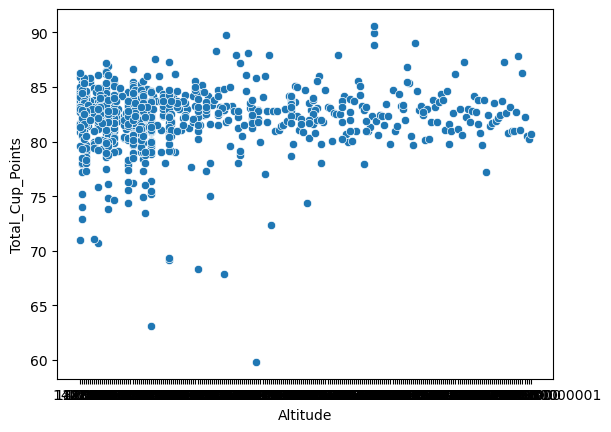

In [204]:
# created a scatter plot graphing Total_Cup_Points against Altitude 

sns.scatterplot(data=altitude, x="Altitude", y="Total_Cup_Points")

plt.show()

Through the scatterplot, we concluded that the relationship between `Altitude` and `Total_Cup_Points` was seemingly random. Thus, we decided not to include `Altitude` in our dataset when building our model.

### DateTime Analysis

In the following section, we looked at the relationship between the difference between the age of the coffee beans (that is, the difference between `Harvest_Year` and `Grading_Date`) and the `Total_Cup_Points`. We first cleaned our data to be able to compute the difference in years, and then graphed our data on a scatterplot.

In [207]:
# created new dataframe with only the Grading_Date, Harvest_Year, and Total_Cup_Points

time = coffee[["Grading_Date", "Harvest_Year", "Total_Cup_Points"]].dropna()
time

Grading_Date Harvest_Year  Total_Cup_Points
0      February 4th, 2014         2013             80.50
1       October 9th, 2012         2012             84.58
2           May 8th, 2014         2014             72.92
3         April 5th, 2016         2015             83.17
4      January 24th, 2013         2012             84.08
...                   ...          ...               ...
1063   February 1st, 2011      4t/2011             83.00
1064     April 26th, 2014         2013             80.42
1066    August 22nd, 2017         2017             82.75
1067      July 31st, 2015         2015             82.92
1068  February 20th, 2017         2016             82.08

[1035 rows x 3 columns]

In [209]:
# converted the Grading_Date and Harvest_Year to DateTime objects, and then converted them to integers
# also dropped null values from the dataset

time['Grading_Date'] = pd.to_datetime(time['Grading_Date'])
time['Grading_Date'] = time['Grading_Date'].dt.strftime("%Y")
time['Grading_Date'] = time['Grading_Date'].astype(int)

time['Harvest_Year'] = pd.to_datetime(time['Harvest_Year'], errors='coerce')
time['Harvest_Year'] = time['Harvest_Year'].dt.strftime("%Y")

time = time.dropna()
time

Grading_Date Harvest_Year  Total_Cup_Points
0             1970         2013             80.50
1             1970         2012             84.58
2             1970         2014             72.92
3             1970         2015             83.17
4             1970         2012             84.08
...            ...          ...               ...
1063          1970         2011             83.00
1064          1970         2013             80.42
1066          1970         2017             82.75
1067          1970         2015             82.92
1068          1970         2016             82.08

[919 rows x 3 columns]

In [19]:
# after changing the Harvest_Year column type to int, we calculuted the difference between 
# "Grading_Date" and "Harvest_Year"

time['Harvest_Year'] = time['Harvest_Year'].astype(int)

difference = time["Grading_Date"] - time["Harvest_Year"]
time["Difference"] = difference
time

/var/folders/6n/gp843ynj5yq3znfj6q53n2jc0000gn/T/ipykernel_86967/4150204775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['Harvest_Year'] = time['Harvest_Year'].astype(int)
/var/folders/6n/gp843ynj5yq3znfj6q53n2jc0000gn/T/ipykernel_86967/4150204775.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time["Difference"] = difference


Grading_Date  Harvest_Year  Total_Cup_Points  Difference
0             2014          2013             80.50           1
1             2012          2012             84.58           0
2             2014          2014             72.92           0
3             2016          2015             83.17           1
4             2013          2012             84.08           1
...            ...           ...               ...         ...
1063          2011          2011             83.00           0
1064          2014          2013             80.42           1
1066          2017          2017             82.75           0
1067          2015          2015             82.92           0
1068          2017          2016             82.08           1

[919 rows x 4 columns]

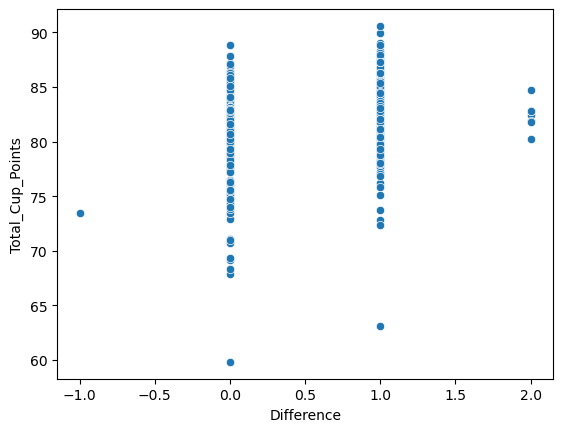

In [20]:
# plotted difference between Harvest_Year and Grading_Date with Total_Cup_Points -- there is no visible trend

sns.scatterplot(data=time, x="Difference", y="Total_Cup_Points")

plt.show()

From the above scatterplot, we concluded that there is no visible trend between the difference in years between the date the beans were harvested and the day they were tasted and the `Total_Cup_Points`. We ultimately decided to also omit `Harvest_Year` and `Grading_Date` from the dataset when building our model.

### Certification Body Analysis

Lastly, we decided to look at the relationship between `Certification_Body` and `Total_Cup_Points`. However, as shown by the bar graph, there is not much variation in `Total_Cup_Points` among the different `Certification_Body`s.

In [211]:
# created a new dataframe with only Certificaiton_Body and Total_Cup_Points columns

certif = coffee[["Certification_Body", "Total_Cup_Points"]].dropna()
certif

Certification_Body  Total_Cup_Points
0     Specialty Coffee Association             80.50
1                         Almacafé             84.58
2     Specialty Coffee Association             72.92
3           Yunnan Coffee Exchange             83.17
4     Specialty Coffee Association             84.08
...                            ...               ...
1065  Specialty Coffee Association             83.42
1066  Asociacion Nacional Del Café             82.75
1067       Torch Coffee Lab Yunnan             82.92
1068                      Almacafé             82.08
1069  Specialty Coffee Association             82.50

[1070 rows x 2 columns]

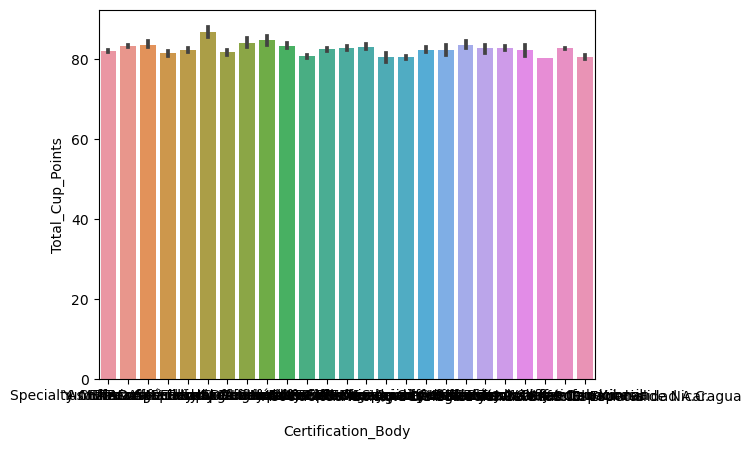

In [212]:
# plotted Certification_Body and Total_Cup_Points using a bar plot-- there is little variation 
# between each Certification_Body

sns.barplot(data = certif, x="Certification_Body", y="Total_Cup_Points")
plt.show()

## Regression

By analyzing the pairplot and dataframe generated by the .corr() function, we chose `Aroma`, `Aftertaste`, `Acidity`, `Flavor`, `Body`, `Balance`, `Uniformity`, `Clean_Cup`, and `Cupper_Points`(another standardized score for coffee) to predict `Total_Cup_Points`. 

We used multi-linear regression, LASSO, and Ridge models.

In [44]:
# split data into train and test datasets

train, test = train_test_split(coffee, test_size=0.2, train_size=0.8)

X_train = train[["Aroma", "Aftertaste", "Acidity", "Flavor", "Body", "Balance", "Uniformity", "Clean_Cup", "Cupper_Points"]]
y_train = train[["Total_Cup_Points"]]

X_test = test[["Aroma", "Aftertaste", "Acidity", "Flavor", "Body", "Balance", "Uniformity", "Clean_Cup", "Cupper_Points"]]
y_test = test[["Total_Cup_Points"]]

In [59]:
#linear regression model

coffee_linear = LinearRegression()

coffee_linear.fit(X_train, y_train)

coffee_linear_pred = coffee_linear.predict(X_test)

coffee_linear_mse = mean_squared_error(y_test, coffee_linear_pred)
coffee_linear_r2 = r2_score(y_test, coffee_linear_pred)

print("Linear Coffee Model Mean Squared Error: {:}".format(coffee_linear_mse))
print("Linear Coffee Model R2: {:}".format(coffee_linear_r2))

Linear Coffee Model Mean Squared Error: 0.4096685916440546
Linear Coffee Model R2: 0.9486285792942724


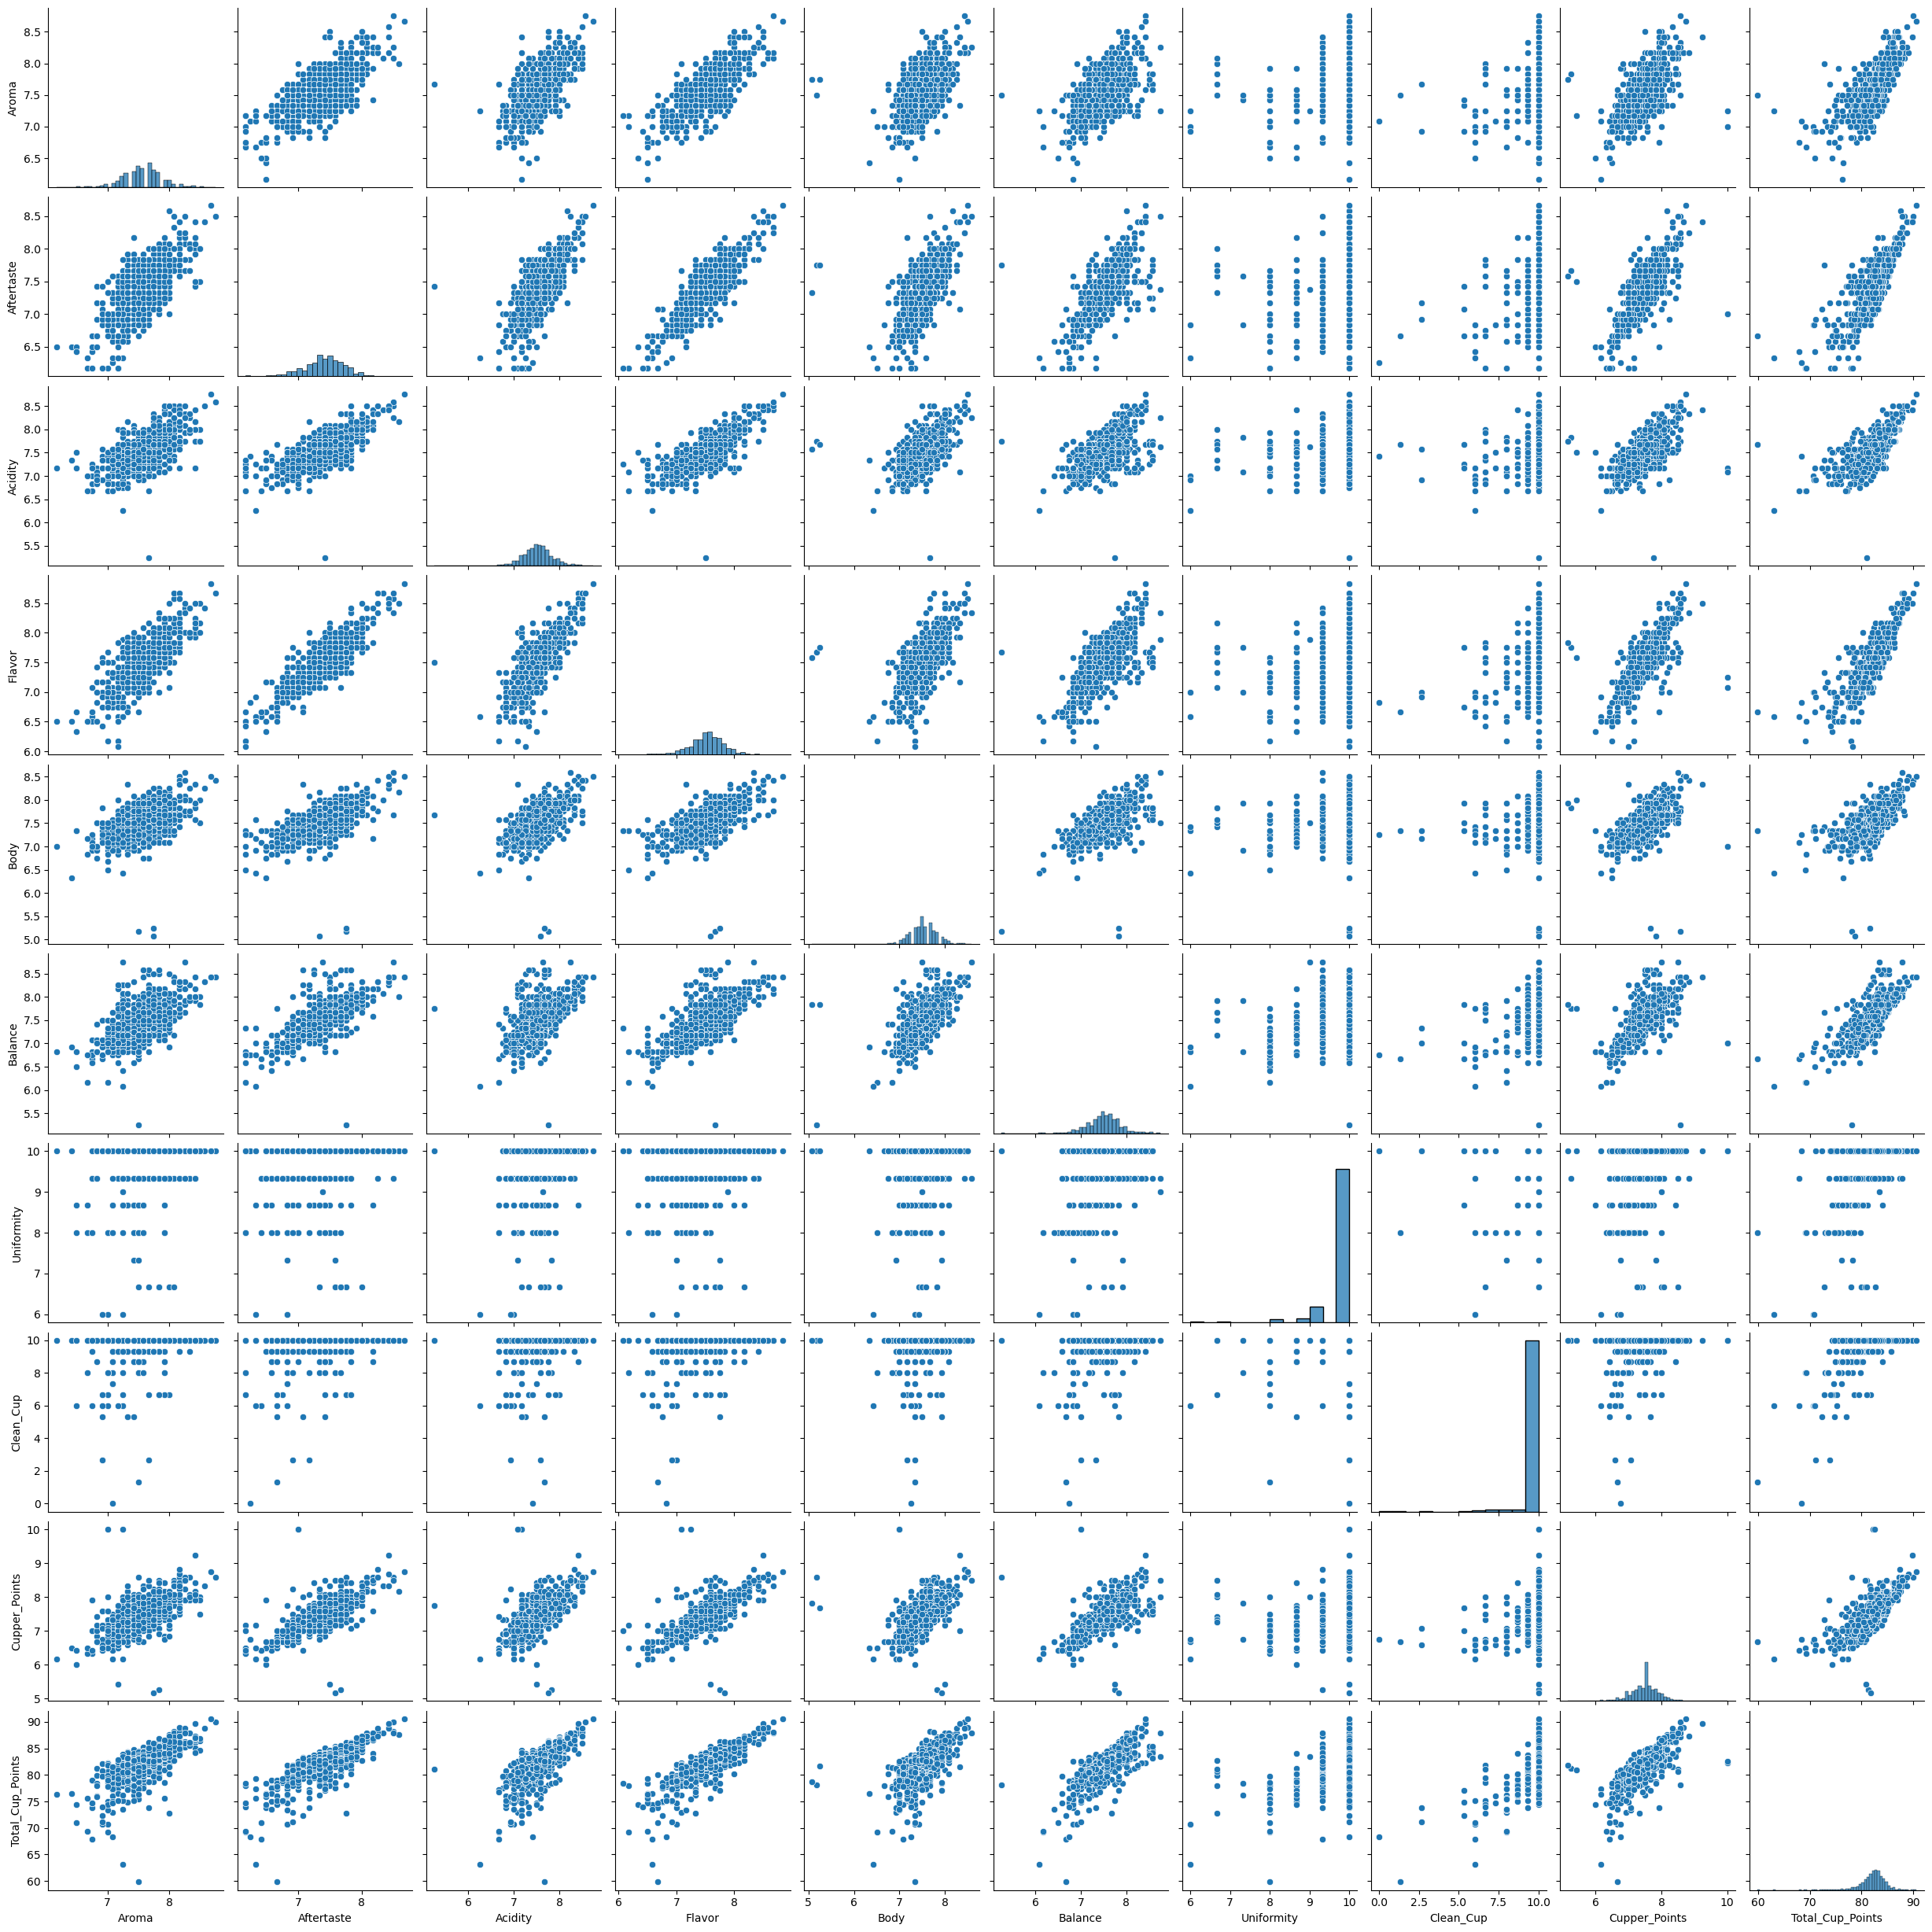

In [60]:
# pairplot shows the relationships between the features we selected for regression

sns.pairplot(coffee[["Aroma", "Aftertaste", "Acidity", "Flavor", "Body", "Balance", "Uniformity", "Clean_Cup", "Cupper_Points", "Total_Cup_Points"]])

plt.show()

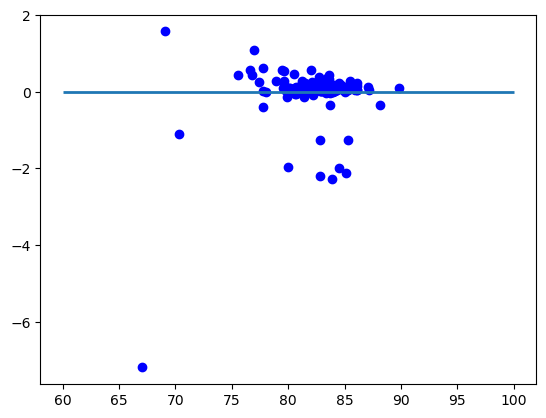

In [61]:
# plotted residuals
# residuals are pretty random but very close together, maybe a different model would be better?

coffee_linear_residuals = (y_test - coffee_linear_pred)

plt.scatter(coffee_linear_pred, coffee_linear_residuals,
            color = "blue", label = 'Test data')
plt.hlines(y = 0, xmin = 60, xmax = 100, linewidth = 2)
plt.show()

The $r^2$ and mean squared error of our muti-linear regression model tells us that our model is pretty accurate, but after looking at the residuals plot, we decided to try other models as well.

In [62]:
# trying Lasso Model-- does not have a good r2 or mse

coffee_lasso = Lasso() # Initialize model

coffee_lasso.fit(X_train, y_train) # fit the model

# make predictions on validation set
coffee_lasso_pred = coffee_lasso.predict(X_test)

# find mean squared error
coffee_lasso_mse = mean_squared_error(y_test, coffee_lasso_pred)
coffee_lasso_r2 = r2_score(y_test, coffee_lasso_pred)

print("Mean Squared Error of Lasso Model: {:}".format(coffee_lasso_mse))
print("R2 of Lasso Model: {: }".format(coffee_lasso_r2))

Mean Squared Error of Lasso Model: 7.031943325804162
R2 of Lasso Model:  0.11821182698187416


In [63]:
# using Ridge model instead-- seems better than linear model!

coffee_ridge = Ridge() # Initialize model

coffee_ridge.fit(X_train, y_train) # fit the model

# make predictions on validation set
coffee_ridge_pred = coffee_ridge.predict(X_test)

# find mean squared error
coffee_ridge_mse = mean_squared_error(y_test, coffee_ridge_pred)
coffee_ridge_r2 = r2_score(y_test, coffee_ridge_pred)

print("Mean Squared Error of Ridge Model: {:}".format(coffee_ridge_mse))
print("R2 of Ridge Model: {: }".format(coffee_ridge_r2))

Mean Squared Error of Ridge Model: 0.4093360068747818
R2 of Ridge Model:  0.9486702845957065


By looking at the $r^2$ and mean squared error of our LASSO and Ridge models, we concluded that the LASSO model is not a good fit for our dataset, while the Ridge model seems to have performed slightly better than our linear regression model. 

A reason for why the LASSO model may not have performed as well is because many of our explanatory variables are correlated, and thus LASSO regression only accounts for one of these variables and sets the others to zero. On the other hand, since Ridge regression takes the square of the coefficients in the model, it works well for our dataset since there are many features that have similar values/trends.